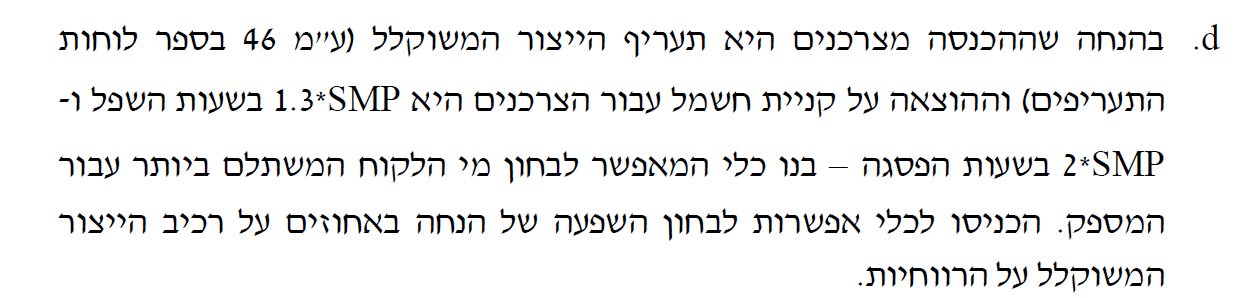

# imports

In [10]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

CONSUMERS_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/consumers.csv"
DEMAND_HOURS_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/demand_hours_data.csv"
SMP_PATH = "/content/drive/MyDrive/Doral_Energy/data/data_prep/smp_with_peak_time.csv"

Mounted at /content/drive


# Load the data


Consumers Data Frame

In [11]:
consumers_df = pd.read_csv(CONSUMERS_PATH)
consumers_df

,consumer_id,date,hour,kWh_amount
0,1,01/12/2021,00:00:00,1287.0
1,1,01/12/2021,00:30:00,1217.0
2,1,01/12/2021,01:00:00,1216.0
3,1,01/12/2021,01:30:00,1212.0
4,1,01/12/2021,02:00:00,1206.0
...,...,...,...,...
67911,4,31/12/2021,21:30:00,622.0
67912,4,31/12/2021,22:00:00,617.0
67913,4,31/12/2021,22:30:00,606.0
67914,4,31/12/2021,23:00:00,601.0


Demand Hours Data Frame

In [12]:
demand_hours_df = pd.read_csv(DEMAND_HOURS_PATH)
demand_hours_df

,month,hour,is_weekday,is_peak_hour,weighted_prod_rate
0,12,00:00,1,0,19.42
1,12,01:00,1,0,19.42
2,12,02:00,1,0,19.42
3,12,03:00,1,0,19.42
4,12,04:00,1,0,19.42
...,...,...,...,...,...
571,11,19:00,0,0,18.64
572,11,20:00,0,0,18.64
573,11,21:00,0,0,18.64
574,11,22:00,0,0,18.64


SMP Data Frame

In [13]:
smp_df = pd.read_csv(SMP_PATH)
smp_df

,date,hour,smp_const,smp_no_const,is_weekday,is_peak_time
0,01/01/2021,00:00,117.24,113.80,0,0
1,01/01/2021,00:30,114.10,112.70,0,0
2,01/01/2021,01:00,111.19,111.19,0,0
3,01/01/2021,01:30,100.81,100.81,0,0
4,01/01/2021,02:00,110.02,110.02,0,0
...,...,...,...,...,...,...
33447,30/11/2022,21:30,102.44,129.85,1,1
33448,30/11/2022,22:00,102.45,175.90,1,0
33449,30/11/2022,22:30,102.45,122.00,1,0
33450,30/11/2022,23:00,102.45,112.77,1,0


# Manipulation on consumers_df

In [14]:
# Convert the "date" and "hour" columns in the both data frames for future merge between them
consumers_df['date'] = pd.to_datetime(consumers_df['date'], format='%d/%m/%Y')
consumers_df['hour'] = pd.to_datetime(consumers_df['hour'])
consumers_df['hour'] = consumers_df['hour'].dt.strftime('%H:%M')

smp_df['date'] = pd.to_datetime(smp_df['date'], format='%d/%m/%Y')
smp_df['hour'] = pd.to_datetime(smp_df['hour'])
smp_df['hour'] = smp_df['hour'].dt.strftime('%H:%M')

In [15]:
# Merge the two data frames based on the "date" and "hour" columns
consumers_smp_df = pd.merge(consumers_df, smp_df, on=["date", "hour"])

In [16]:
# Select the columns to display
consumers_smp_df = consumers_smp_df[["consumer_id", "date", "hour", "kWh_amount", "smp_no_const", "is_peak_time"]]
consumers_smp_df

,consumer_id,date,hour,kWh_amount,smp_no_const,is_peak_time
0,1,2021-12-01,00:00,1287.00,106.65,0
1,2,2021-12-01,00:00,287.80,106.65,0
2,4,2021-12-01,00:00,581.00,106.65,0
3,1,2021-12-01,00:30,1217.00,106.44,0
4,2,2021-12-01,00:30,267.82,106.44,0
...,...,...,...,...,...,...
66659,2,2021-11-30,21:30,421.50,114.51,1
66660,2,2021-11-30,22:00,383.14,113.65,0
66661,2,2021-11-30,22:30,343.92,110.31,0
66662,2,2021-11-30,23:00,313.90,107.51,0


In [17]:
from datetime import datetime

# add column of hour without minutes
demand_hours_df['hour_with_no_minutes'] = demand_hours_df['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').strftime('%H'))
consumers_smp_df['hour_with_no_minutes'] = consumers_smp_df['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').strftime('%H'))

# Using dictionary for adding weighted_prod_rate to consumers_smp_df
my_dict = {}
for index, row in demand_hours_df.iterrows():
  key = (row['month'], row['hour_with_no_minutes'], row["is_peak_hour"])
  value = row['weighted_prod_rate']
  my_dict[key] = value

print(my_dict)

{(12, '00', 0): 19.42, (12, '01', 0): 19.42, (12, '02', 0): 19.42, (12, '03', 0): 19.42, (12, '04', 0): 19.42, (12, '05', 0): 19.42, (12, '06', 0): 19.42, (12, '07', 0): 19.42, (12, '08', 0): 19.42, (12, '09', 0): 19.42, (12, '10', 0): 19.42, (12, '11', 0): 19.42, (12, '12', 0): 19.42, (12, '13', 0): 19.42, (12, '14', 0): 19.42, (12, '15', 0): 19.42, (12, '16', 0): 19.42, (12, '17', 1): 72.85, (12, '18', 1): 72.85, (12, '19', 1): 72.85, (12, '20', 1): 72.85, (12, '21', 1): 72.85, (12, '22', 0): 19.42, (12, '23', 0): 19.42, (1, '00', 0): 19.42, (1, '01', 0): 19.42, (1, '02', 0): 19.42, (1, '03', 0): 19.42, (1, '04', 0): 19.42, (1, '05', 0): 19.42, (1, '06', 0): 19.42, (1, '07', 0): 19.42, (1, '08', 0): 19.42, (1, '09', 0): 19.42, (1, '10', 0): 19.42, (1, '11', 0): 19.42, (1, '12', 0): 19.42, (1, '13', 0): 19.42, (1, '14', 0): 19.42, (1, '15', 0): 19.42, (1, '16', 0): 19.42, (1, '17', 1): 72.85, (1, '18', 1): 72.85, (1, '19', 1): 72.85, (1, '20', 1): 72.85, (1, '21', 1): 72.85, (1, '22',

In [18]:
# Extract the month from date
consumers_smp_df['date'] = pd.to_datetime(consumers_smp_df['date'], format='%d/%m/%Y')
consumers_smp_df['month'] = consumers_smp_df['date'].dt.month
consumers_smp_df

,consumer_id,date,hour,kWh_amount,smp_no_const,is_peak_time,hour_with_no_minutes,month
0,1,2021-12-01,00:00,1287.00,106.65,0,00,12
1,2,2021-12-01,00:00,287.80,106.65,0,00,12
2,4,2021-12-01,00:00,581.00,106.65,0,00,12
3,1,2021-12-01,00:30,1217.00,106.44,0,00,12
4,2,2021-12-01,00:30,267.82,106.44,0,00,12
...,...,...,...,...,...,...,...,...
66659,2,2021-11-30,21:30,421.50,114.51,1,21,11
66660,2,2021-11-30,22:00,383.14,113.65,0,22,11
66661,2,2021-11-30,22:30,343.92,110.31,0,22,11
66662,2,2021-11-30,23:00,313.90,107.51,0,23,11


In [19]:
consumers_smp_df['weighted_prod_rate'] = consumers_smp_df.apply(lambda row: my_dict.get((row['month'], row['hour_with_no_minutes'], row['is_peak_time']), None), axis=1)
# Drop unnecessary cols from consumers_smp_df
consumers_smp_df.drop(['hour_with_no_minutes', 'month'], axis=1, inplace=True)


# Display the new data frame

The new data frame containes all the consumer_ids with their consumption details(date, hour and amount), the smp price, if it is a peak time or not and also the weighted production rate

In [20]:
consumers_smp_df

,consumer_id,date,hour,kWh_amount,smp_no_const,is_peak_time,weighted_prod_rate
0,1,2021-12-01,00:00,1287.00,106.65,0,19.42
1,2,2021-12-01,00:00,287.80,106.65,0,19.42
2,4,2021-12-01,00:00,581.00,106.65,0,19.42
3,1,2021-12-01,00:30,1217.00,106.44,0,19.42
4,2,2021-12-01,00:30,267.82,106.44,0,19.42
...,...,...,...,...,...,...,...
66659,2,2021-11-30,21:30,421.50,114.51,1,22.27
66660,2,2021-11-30,22:00,383.14,113.65,0,18.64
66661,2,2021-11-30,22:30,343.92,110.31,0,18.64
66662,2,2021-11-30,23:00,313.90,107.51,0,18.64


# The Most Profitable Customer

In [21]:
# Set the rates for off-peak and peak hours
OFF_PEAK_RATE = 1.3
PEAK_RATE = 2

In [22]:
percentage = float(input("Please enter the percentage amount you would like to give the customer for the discount: "))

Please enter the percentage amount you would like to give the customer for the discount: 0


In [23]:
# Examine the Effect of a Percentage Discount
if percentage > 0: 
   OFF_PEAK_RATE = OFF_PEAK_RATE * (100 - percentage) / 100
   PEAK_RATE = PEAK_RATE * (100 - percentage) / 100

In [25]:
# Get a list of unique consumer IDs
consumer_ids = consumers_smp_df['consumer_id'].unique()

# Initialize an empty dictionaries to hold each consumer's income, expenditure and profit
incomes = {}
expenditures = {}
profits = {}

# Loop over each consumer ID
for consumer_id in consumer_ids:
    # Filter the dataframe to get the data for this consumer
    consumer_data = consumers_smp_df[consumers_smp_df['consumer_id'] == consumer_id]

    # Initialize the consumer's cost
    consumer_cost = 0.0
    expend_cons = 0.0

    
    # Loop over each row in the filtered dataframe
    for index, row in consumer_data.iterrows():
      # If it's peak time, multiply the smp price by 2, otherwise multiply by 1.3
      if row['is_peak_time'] == 1:
        cost = row['smp_no_const'] * PEAK_RATE * row['kWh_amount']
      else:
        cost = row['smp_no_const'] * OFF_PEAK_RATE * row['kWh_amount']

      expend = row['kWh_amount'] * row['weighted_prod_rate']

      consumer_cost += cost
      expend_cons += expend
    
    # Add the consumer's total cost to the dictionary and convert from pennies to NIS
    incomes[consumer_id] = round(consumer_cost / 100, 2)
    expenditures[consumer_id] = round(expend_cons / 100, 2)
    profits[consumer_id] = round(incomes[consumer_id] - expenditures[consumer_id], 2)

print(incomes)
print(expenditures)
print(profits)

{1: 19308658.65, 2: 11194697.25, 4: 49652235.45, 3: 7370841.28}
{1: 3121873.81, 2: 1939864.35, 4: 8338070.08, 3: 1271236.67}
{1: 16186784.84, 2: 9254832.9, 4: 41314165.37, 3: 6099604.61}


In [26]:
most_profit_customer = max(profits, key=profits.get)
prof = profits[most_profit_customer]
print(f"The Most Profit Customer for the Provider is Customer {most_profit_customer} with profit of {prof} NIS")

The Most Profit Customer for the Provider is Customer 4 with profit of 41314165.37 NIS
